# Classification Models for HMEQ

## Importing the libraries

In [26]:
# İlgili kütüphaneleri import edelim;

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [78]:
train_df = pd.read_csv('train2023.csv', delimiter=",")
train_df

,index,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,0,34.521450,40000,134029.0,191990.0,DebtCon,Mgr,NaN,1.0,0.0,178.780960,0.0,24.0,0
1,1,34.357866,25500,113204.0,184561.0,DebtCon,Sales,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,2,25.623639,26000,20119.0,54563.0,DebtCon,Other,24.0,0.0,0.0,126.987959,0.0,11.0,0
3,3,38.217726,8700,77377.0,97070.0,DebtCon,Mgr,3.0,0.0,0.0,68.854877,2.0,24.0,0
4,4,41.538051,15800,51281.0,144202.0,DebtCon,Other,1.0,0.0,0.0,285.997898,4.0,43.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,4763,29.802859,19200,153722.0,199812.0,DebtCon,ProfExe,13.0,NaN,NaN,121.942916,0.0,24.0,0
4764,4764,NaN,20500,52031.0,64975.0,NaN,Other,2.5,1.0,3.0,105.533333,2.0,33.0,1
4765,4765,39.529904,26600,49610.0,78355.0,DebtCon,Other,23.0,NaN,0.0,278.603564,0.0,30.0,0
4766,4766,NaN,13000,70000.0,90704.0,DebtCon,Other,15.0,0.0,3.0,142.166667,0.0,37.0,1


In [28]:
test_df = pd.read_csv('test2023.csv', delimiter=",")
test_df

,index,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,4768,22.065764,25800,NaN,63456.0,DebtCon,Other,25.0,0.0,0.0,148.816285,0.0,8.0
1,4769,20.380464,16400,62018.0,91832.0,DebtCon,ProfExe,9.0,0.0,0.0,202.322500,0.0,19.0
2,4770,29.476003,22400,18371.0,38311.0,DebtCon,Other,1.0,0.0,0.0,37.235000,2.0,3.0
3,4771,NaN,33400,59000.0,85000.0,HomeImp,Self,2.0,0.0,7.0,240.433333,3.0,26.0
4,4772,29.045964,23000,71902.0,101750.0,HomeImp,Other,5.0,0.0,0.0,214.389252,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,5955,25.991820,16100,26276.0,168105.0,HomeImp,Self,7.0,0.0,0.0,336.198465,0.0,26.0
1188,5956,34.430575,16500,23169.0,41677.0,DebtCon,ProfExe,20.0,0.0,0.0,208.076943,2.0,15.0
1189,5957,NaN,6500,70300.0,107500.0,DebtCon,Office,1.0,0.0,0.0,242.466667,1.0,38.0
1190,5958,27.056727,26700,81968.0,114647.0,DebtCon,ProfExe,10.0,0.0,1.0,126.707320,0.0,19.0


In [29]:
# Veri setini daha iyi anlamak için çeşitli özelliklerini görsellerle gözlemleyelim, yani bir EDA gözlemi yapalım;
# Bu gözlem için ydata-profiling kütüphanesini kullanacağız, ilk önce gerekli import işlemlerini yapalım;
# Bu cell'i çalıştırdıktan sonra kernel'i restart yapmalıyız;

# import sys
# !{sys.executable} -m pip install -U ydata-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [30]:
# ydata_profiling paketini import edelim

from ydata_profiling import ProfileReport

In [79]:
# Görselleştireceğimiz veri setini ProfileReport modülüne verelim;

pr_df = ProfileReport(train_df)

pr_df

Output hidden; open in https://colab.research.google.com to view.

In [32]:
# Veri setinin Dtype ve genel bilgilerine bakalım;
for i in range(1):
    train_df.info()
    print('\n')
    test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    4768 non-null   int64  
 1   DEBTINC  3741 non-null   float64
 2   LOAN     4768 non-null   int64  
 3   MORTDUE  4365 non-null   float64
 4   VALUE    4680 non-null   float64
 5   REASON   4568 non-null   object 
 6   JOB      4550 non-null   object 
 7   YOJ      4357 non-null   float64
 8   DEROG    4193 non-null   float64
 9   DELINQ   4300 non-null   float64
 10  CLAGE    4531 non-null   float64
 11  NINQ     4352 non-null   float64
 12  CLNO     4592 non-null   float64
 13  BAD      4768 non-null   int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 521.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    1192 non-null   int64 

In [33]:
train_df.drop('index', axis=1, inplace=True)
train_df

,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,34.521450,40000,134029.0,191990.0,DebtCon,Mgr,NaN,1.0,0.0,178.780960,0.0,24.0,0
1,34.357866,25500,113204.0,184561.0,DebtCon,Sales,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,25.623639,26000,20119.0,54563.0,DebtCon,Other,24.0,0.0,0.0,126.987959,0.0,11.0,0
3,38.217726,8700,77377.0,97070.0,DebtCon,Mgr,3.0,0.0,0.0,68.854877,2.0,24.0,0
4,41.538051,15800,51281.0,144202.0,DebtCon,Other,1.0,0.0,0.0,285.997898,4.0,43.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,29.802859,19200,153722.0,199812.0,DebtCon,ProfExe,13.0,NaN,NaN,121.942916,0.0,24.0,0
4764,NaN,20500,52031.0,64975.0,NaN,Other,2.5,1.0,3.0,105.533333,2.0,33.0,1
4765,39.529904,26600,49610.0,78355.0,DebtCon,Other,23.0,NaN,0.0,278.603564,0.0,30.0,0
4766,NaN,13000,70000.0,90704.0,DebtCon,Other,15.0,0.0,3.0,142.166667,0.0,37.0,1


In [34]:
# Veri setimizdeki kategorik ve sayısal değişkenleri belirleyelim;
# Kategorik değişkenleri bir listeye atayalım;

# 'BAD' sütununu kategorik sütunlar listesine ekleyelim
train_df['BAD'] = train_df['BAD'].astype('category')

categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Kategorik değişkenleri görelim;
train_df[categorical_columns]


,REASON,JOB,BAD
0,DebtCon,Mgr,0
1,DebtCon,Sales,0
2,DebtCon,Other,0
3,DebtCon,Mgr,0
4,DebtCon,Other,0
...,...,...,...
4763,DebtCon,ProfExe,0
4764,NaN,Other,1
4765,DebtCon,Other,0
4766,DebtCon,Other,1


In [35]:
# Şimdi de sayısal değişkenleri görelim;
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Sayısal değişkenleri görelim;
train_df[numerical_columns]

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,34.521450,40000,134029.0,191990.0,NaN,1.0,0.0,178.780960,0.0,24.0
1,34.357866,25500,113204.0,184561.0,17.0,1.0,0.0,308.958198,1.0,31.0
2,25.623639,26000,20119.0,54563.0,24.0,0.0,0.0,126.987959,0.0,11.0
3,38.217726,8700,77377.0,97070.0,3.0,0.0,0.0,68.854877,2.0,24.0
4,41.538051,15800,51281.0,144202.0,1.0,0.0,0.0,285.997898,4.0,43.0
...,...,...,...,...,...,...,...,...,...,...
4763,29.802859,19200,153722.0,199812.0,13.0,NaN,NaN,121.942916,0.0,24.0
4764,NaN,20500,52031.0,64975.0,2.5,1.0,3.0,105.533333,2.0,33.0
4765,39.529904,26600,49610.0,78355.0,23.0,NaN,0.0,278.603564,0.0,30.0
4766,NaN,13000,70000.0,90704.0,15.0,0.0,3.0,142.166667,0.0,37.0


In [36]:
# Sayısal değişkenleri sürekli ve kesikili olarak ayıralım;
# Kesikli değişkenleri liste yapalım;

discrete_columns = ['DEROG', 'DELINQ', 'NINQ', 'CLNO']

train_df[discrete_columns]

,DEROG,DELINQ,NINQ,CLNO
0,1.0,0.0,0.0,24.0
1,1.0,0.0,1.0,31.0
2,0.0,0.0,0.0,11.0
3,0.0,0.0,2.0,24.0
4,0.0,0.0,4.0,43.0
...,...,...,...,...
4763,NaN,NaN,0.0,24.0
4764,1.0,3.0,2.0,33.0
4765,NaN,0.0,0.0,30.0
4766,0.0,3.0,0.0,37.0


In [37]:
# Sürekli değişkenleri de liste yapalım;

continuous_columns = [col for col in numerical_columns if col not in discrete_columns]

train_df[continuous_columns]

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,CLAGE
0,34.521450,40000,134029.0,191990.0,NaN,178.780960
1,34.357866,25500,113204.0,184561.0,17.0,308.958198
2,25.623639,26000,20119.0,54563.0,24.0,126.987959
3,38.217726,8700,77377.0,97070.0,3.0,68.854877
4,41.538051,15800,51281.0,144202.0,1.0,285.997898
...,...,...,...,...,...,...
4763,29.802859,19200,153722.0,199812.0,13.0,121.942916
4764,NaN,20500,52031.0,64975.0,2.5,105.533333
4765,39.529904,26600,49610.0,78355.0,23.0,278.603564
4766,NaN,13000,70000.0,90704.0,15.0,142.166667


In [38]:
# Sadece null değerlere sahip sütunları ve null sayılarını yazdıralım (büyükten küçüğe sıralı);

null_counts = train_df.isnull().sum().sort_values(ascending=False)

for column, null_count in null_counts.items():
    if null_count > 0:
        print(f"{column}: {null_count}")

DEBTINC: 1027
DEROG: 575
DELINQ: 468
NINQ: 416
YOJ: 411
MORTDUE: 403
CLAGE: 237
JOB: 218
REASON: 200
CLNO: 176
VALUE: 88


In [39]:
# Sadece null değerlere sahip sütunları ve null sayılarını yazdıralım (büyükten küçüğe sıralı);

null_counts_test = test_df.isnull().sum().sort_values(ascending=False)

for column, null_count in null_counts_test.items():
    if null_count > 0:
        print(f"{column}: {null_count}")

DEBTINC: 240
DEROG: 133
MORTDUE: 115
DELINQ: 112
YOJ: 104
NINQ: 94
CLAGE: 71
JOB: 61
REASON: 52
CLNO: 46
VALUE: 24


In [40]:
# Veri setinde null değer içeren değişkenlere DataFrame üzerinden bakalım;

train_df[null_counts.index]

,DEBTINC,DEROG,DELINQ,NINQ,YOJ,MORTDUE,CLAGE,JOB,REASON,CLNO,VALUE,LOAN,BAD
0,34.521450,1.0,0.0,0.0,NaN,134029.0,178.780960,Mgr,DebtCon,24.0,191990.0,40000,0
1,34.357866,1.0,0.0,1.0,17.0,113204.0,308.958198,Sales,DebtCon,31.0,184561.0,25500,0
2,25.623639,0.0,0.0,0.0,24.0,20119.0,126.987959,Other,DebtCon,11.0,54563.0,26000,0
3,38.217726,0.0,0.0,2.0,3.0,77377.0,68.854877,Mgr,DebtCon,24.0,97070.0,8700,0
4,41.538051,0.0,0.0,4.0,1.0,51281.0,285.997898,Other,DebtCon,43.0,144202.0,15800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,29.802859,NaN,NaN,0.0,13.0,153722.0,121.942916,ProfExe,DebtCon,24.0,199812.0,19200,0
4764,NaN,1.0,3.0,2.0,2.5,52031.0,105.533333,Other,NaN,33.0,64975.0,20500,1
4765,39.529904,NaN,0.0,0.0,23.0,49610.0,278.603564,Other,DebtCon,30.0,78355.0,26600,0
4766,NaN,0.0,3.0,0.0,15.0,70000.0,142.166667,Other,DebtCon,37.0,90704.0,13000,1


In [41]:
# Missing Value'ları dolduralım;
# Mean ile doldurulacaklar;

# DEBTINC: 1267 tane missing value'ya sahiptir, DEBTINC değişkeninin ortalaması 33, median'ı ise 34 küsur civarlarındadır, DEBTINC'i mean'i ile dolduralım;
# MORTDUE: 518 tane missing value'ya sahiptir, MORTDUE değişkeninin ortalaması 73 bin, median'ı ise 65 bin küsur civarlarındadır, MORTDUE'ı mean'i ile dolduralım;
# YOJ: 515 tane missing value'ya sahiptir, YOJ değişkeninin ortalaması 9, median'ı ise 7'dir, YOJ'ı mean'i ile dolduralım;
# NINQ: 510 tane missing value'ya sahiptir, NINQ değişkeninin ortalaması 1, median'ı da 1'dir, NINQ'yu mean'i ile dolduralım;
# CLAGE: 308 tane missing value'ya sahiptir, CLAGE değişkeninin ortalaması 179, median'ı ise 173'dir, CLAGE'i mean'i ile dolduralım;
# CLNO: 222 tane missing value'ya sahiptir, CLNO değişkeninin ortalaması 21, median'ı ise 20'dir, CLNO'yu mean'i ile dolduralım;
# VALUE: 112 tane missing value'ya sahiptir, VALUE değişkeninin ortalaması 101 bin, median'ı ise 89 bin'dir, VALUE'yu mean'i ile dolduralım;

In [42]:
# Null değerleri kendi ortalamaları ile yuvarlayarak dolduralım (lambda fonksiyonu kullanarak);

fillna_mean = ['DEBTINC', 'MORTDUE', 'YOJ', 'NINQ', 'CLAGE', 'CLNO', 'VALUE']

for column in fillna_mean:
    mean_value = train_df[column].mean()
    train_df[column] = train_df[column].apply(lambda x: round(mean_value) if pd.isnull(x) else x)

    mean_value_test = test_df[column].mean()
    test_df[column] = test_df[column].apply(lambda x: round(mean_value_test) if pd.isnull(x) else x)

# Sonucu gösterelim;
train_df


,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,34.521450,40000,134029.0,191990.0,DebtCon,Mgr,9.0,1.0,0.0,178.780960,0.0,24.0,0
1,34.357866,25500,113204.0,184561.0,DebtCon,Sales,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,25.623639,26000,20119.0,54563.0,DebtCon,Other,24.0,0.0,0.0,126.987959,0.0,11.0,0
3,38.217726,8700,77377.0,97070.0,DebtCon,Mgr,3.0,0.0,0.0,68.854877,2.0,24.0,0
4,41.538051,15800,51281.0,144202.0,DebtCon,Other,1.0,0.0,0.0,285.997898,4.0,43.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,29.802859,19200,153722.0,199812.0,DebtCon,ProfExe,13.0,NaN,NaN,121.942916,0.0,24.0,0
4764,34.000000,20500,52031.0,64975.0,NaN,Other,2.5,1.0,3.0,105.533333,2.0,33.0,1
4765,39.529904,26600,49610.0,78355.0,DebtCon,Other,23.0,NaN,0.0,278.603564,0.0,30.0,0
4766,34.000000,13000,70000.0,90704.0,DebtCon,Other,15.0,0.0,3.0,142.166667,0.0,37.0,1


In [43]:
# 0 ile doldurulacaklar;

# DEROG: 708 tane missing value'ya sahiptir. DEROG'da 4527 tane 0 değeri en çok sıklıkla geçmiştir, bu da değişkenin 76.0%'ına denk gelmektedir, buradaki missing'leri 0 ile dolduralım;
# DELINQ: 580 tane missing value'ya sahiptir. DELINQ'da 4179 tane 0 değeri en çok sıklıkla geçmiştir, bu da değişkenin 70.1%ine denk gelmektedir, buradaki missing'leri de 0 ile dolduralım;

In [44]:
# Null değerleri 0 ile dolduralım;

fillna_zero = ['DEROG', 'DELINQ']

train_df[fillna_zero] = train_df[fillna_zero].fillna(0)
test_df[fillna_zero] = test_df[fillna_zero].fillna(0)

# Sonucu gösterelim
train_df

,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,34.521450,40000,134029.0,191990.0,DebtCon,Mgr,9.0,1.0,0.0,178.780960,0.0,24.0,0
1,34.357866,25500,113204.0,184561.0,DebtCon,Sales,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,25.623639,26000,20119.0,54563.0,DebtCon,Other,24.0,0.0,0.0,126.987959,0.0,11.0,0
3,38.217726,8700,77377.0,97070.0,DebtCon,Mgr,3.0,0.0,0.0,68.854877,2.0,24.0,0
4,41.538051,15800,51281.0,144202.0,DebtCon,Other,1.0,0.0,0.0,285.997898,4.0,43.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,29.802859,19200,153722.0,199812.0,DebtCon,ProfExe,13.0,0.0,0.0,121.942916,0.0,24.0,0
4764,34.000000,20500,52031.0,64975.0,NaN,Other,2.5,1.0,3.0,105.533333,2.0,33.0,1
4765,39.529904,26600,49610.0,78355.0,DebtCon,Other,23.0,0.0,0.0,278.603564,0.0,30.0,0
4766,34.000000,13000,70000.0,90704.0,DebtCon,Other,15.0,0.0,3.0,142.166667,0.0,37.0,1


In [45]:
# Kategorik Nul'lar
# Mode ile doldurulacaklar

# JOB: 279 tane missing value vardır. Other	2388 kere en sık geçen değer olduğu için bu değişkeni mode'u ile dolduralım;
# REASON: 252 tane missing value vardır. DebtCon 3928 kere en sık geçen değer olduğu için bu değişkeni de mode'u ile dolduralım;

In [46]:
# Kategorik değişkenler için Null değerleri kendi mode'ları ile dolduralım;

fillna_mode = ['REASON', 'JOB']

for column in fillna_mode:
    mode_value = train_df[column].mode().iloc[0]  # Mod değerini alalım
    train_df[column].fillna(mode_value, inplace=True) # Null'ları mode'u ile dolduralım

    mode_value_test = test_df[column].mode().iloc[0]  # Mod değerini alalım
    test_df[column].fillna(mode_value_test, inplace=True) # Null'ları mode'u ile dolduralım

# Sonucu gösterelim
train_df

,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,34.521450,40000,134029.0,191990.0,DebtCon,Mgr,9.0,1.0,0.0,178.780960,0.0,24.0,0
1,34.357866,25500,113204.0,184561.0,DebtCon,Sales,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,25.623639,26000,20119.0,54563.0,DebtCon,Other,24.0,0.0,0.0,126.987959,0.0,11.0,0
3,38.217726,8700,77377.0,97070.0,DebtCon,Mgr,3.0,0.0,0.0,68.854877,2.0,24.0,0
4,41.538051,15800,51281.0,144202.0,DebtCon,Other,1.0,0.0,0.0,285.997898,4.0,43.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,29.802859,19200,153722.0,199812.0,DebtCon,ProfExe,13.0,0.0,0.0,121.942916,0.0,24.0,0
4764,34.000000,20500,52031.0,64975.0,DebtCon,Other,2.5,1.0,3.0,105.533333,2.0,33.0,1
4765,39.529904,26600,49610.0,78355.0,DebtCon,Other,23.0,0.0,0.0,278.603564,0.0,30.0,0
4766,34.000000,13000,70000.0,90704.0,DebtCon,Other,15.0,0.0,3.0,142.166667,0.0,37.0,1


In [47]:
# Her bir sürekli numerik değişken için outlier'ları baskılayan bir for döngüsü
for column in continuous_columns:
    # Alt ve üst sınırları belirleyin (örneğin, 5. ve 95. percentil)
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Alt sınırdan küçük olan değerleri alt sınıra eşitle
    train_df[column] = train_df[column].apply(lambda x: lower_limit if x < lower_limit else x)

    # Üst sınırdan büyük olan değerleri üst sınıra eşitle
    train_df[column] = train_df[column].apply(lambda x: upper_limit if x > upper_limit else x)

# Sonuçları göster
train_df[continuous_columns].head()


,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,CLAGE
0,34.521450,40000.0,134029.0,191990.0,9.0,178.780960
1,34.357866,25500.0,113204.0,184561.0,17.0,308.958198
2,25.623639,26000.0,20119.0,54563.0,24.0,126.987959
3,38.217726,8700.0,77377.0,97070.0,3.0,68.854877
4,41.538051,15800.0,51281.0,144202.0,1.0,285.997898


In [48]:
# Her bir sürekli numerik değişken için outlier'ları baskılayan bir for döngüsü
for column in continuous_columns:
    # Alt ve üst sınırları belirleyin (örneğin, 5. ve 95. percentil)
    Q1_test = test_df[column].quantile(0.25)
    Q3_test = test_df[column].quantile(0.75)
    IQR_test = Q3_test - Q1_test

    lower_limit_test = Q1_test - 1.5 * IQR_test
    upper_limit_test = Q3_test + 1.5 * IQR_test

    # Alt sınırdan küçük olan değerleri alt sınıra eşitle
    test_df[column] = test_df[column].apply(lambda x: lower_limit_test if x < lower_limit_test else x)

    # Üst sınırdan büyük olan değerleri üst sınıra eşitle
    test_df[column] = test_df[column].apply(lambda x: upper_limit_test if x > upper_limit_test else x)

# Sonuçları göster
test_df[continuous_columns].head()


,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,CLAGE
0,22.065764,25800.0,71759.0,63456.0,24.0,148.816285
1,20.380464,16400.0,62018.0,91832.0,9.0,202.322500
2,29.476003,22400.0,18371.0,38311.0,1.0,37.235000
3,33.000000,33400.0,59000.0,85000.0,2.0,240.433333
4,29.045964,23000.0,71902.0,101750.0,5.0,214.389252


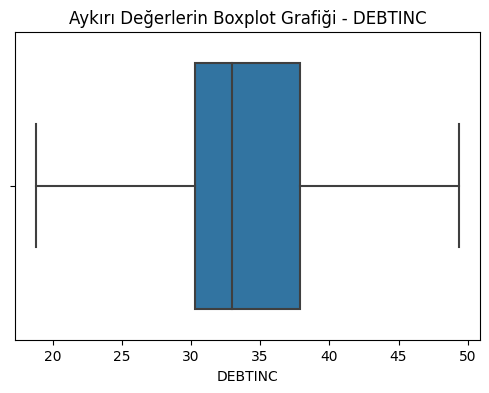

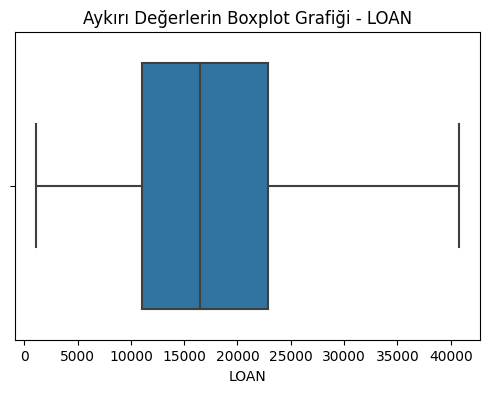

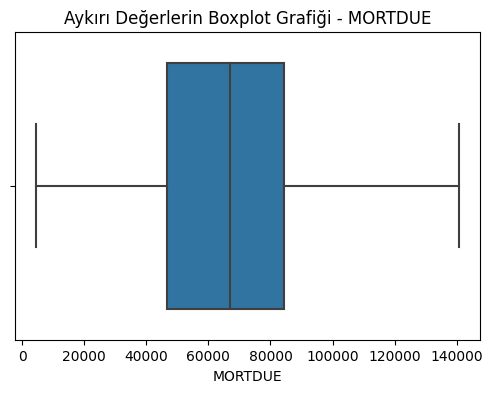

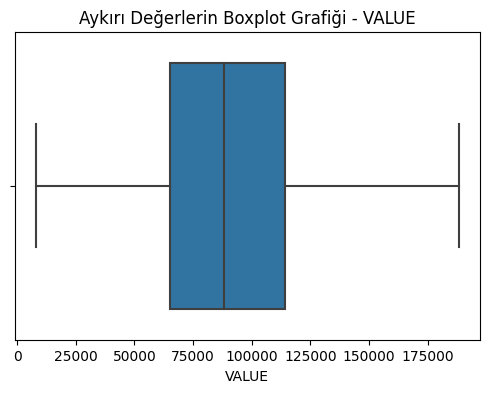

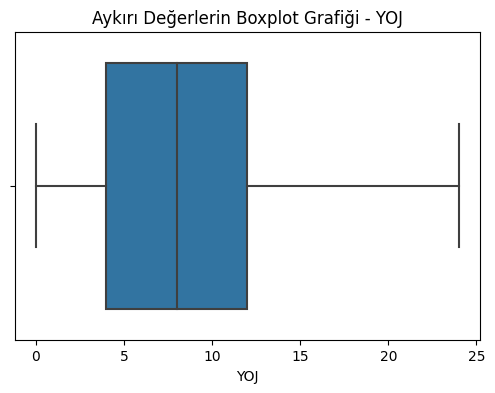

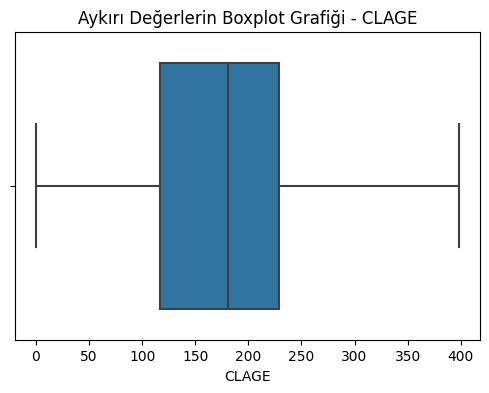

In [49]:
import seaborn as sns

# 'train_df' adlı DataFrame içindeki her bir sütun için ayrı ayrı boxplot grafiği oluştur
for column in continuous_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=test_df[column])  # 'y' parametresi ile sütunun değerlerini belirtiyoruz
    plt.title(f'Aykırı Değerlerin Boxplot Grafiği - {column}')
    plt.show()


In [50]:
# REASON değişkeni için One-Hot Encoding uygulayalım;

for col in fillna_mode:
  train_df = pd.get_dummies(train_df, columns=[col], prefix=col, drop_first=True)
  test_df = pd.get_dummies(test_df, columns=[col], prefix=col, drop_first=True)

# Sonucu gösterelim;
train_df


,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,34.521450,40000.0,134029.000,191990.0,9.0,1.0,0.0,178.780960,0.0,24.0,0,0,0,0,0,0,0
1,34.357866,25500.0,113204.000,184561.0,17.0,1.0,0.0,308.958198,1.0,31.0,0,0,0,0,0,1,0
2,25.623639,26000.0,20119.000,54563.0,24.0,0.0,0.0,126.987959,0.0,11.0,0,0,0,1,0,0,0
3,38.217726,8700.0,77377.000,97070.0,3.0,0.0,0.0,68.854877,2.0,24.0,0,0,0,0,0,0,0
4,41.538051,15800.0,51281.000,144202.0,1.0,0.0,0.0,285.997898,4.0,43.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,29.802859,19200.0,150018.125,199812.0,13.0,0.0,0.0,121.942916,0.0,24.0,0,0,0,0,1,0,0
4764,34.000000,20500.0,52031.000,64975.0,2.5,1.0,3.0,105.533333,2.0,33.0,1,0,0,1,0,0,0
4765,39.529904,26600.0,49610.000,78355.0,23.0,0.0,0.0,278.603564,0.0,30.0,0,0,0,1,0,0,0
4766,34.000000,13000.0,70000.000,90704.0,15.0,0.0,3.0,142.166667,0.0,37.0,1,0,0,1,0,0,0


In [51]:
test_df

,index,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,4768,22.065764,25800.0,71759.0,63456.0,24.0,0.0,0.0,148.816285,0.0,8.0,0,0,1,0,0,0
1,4769,20.380464,16400.0,62018.0,91832.0,9.0,0.0,0.0,202.322500,0.0,19.0,0,0,0,1,0,0
2,4770,29.476003,22400.0,18371.0,38311.0,1.0,0.0,0.0,37.235000,2.0,3.0,0,0,1,0,0,0
3,4771,33.000000,33400.0,59000.0,85000.0,2.0,0.0,7.0,240.433333,3.0,26.0,1,0,0,0,0,1
4,4772,29.045964,23000.0,71902.0,101750.0,5.0,0.0,0.0,214.389252,0.0,13.0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,5955,25.991820,16100.0,26276.0,168105.0,7.0,0.0,0.0,336.198465,0.0,26.0,1,0,0,0,0,1
1188,5956,34.430575,16500.0,23169.0,41677.0,20.0,0.0,0.0,208.076943,2.0,15.0,0,0,0,1,0,0
1189,5957,33.000000,6500.0,70300.0,107500.0,1.0,0.0,0.0,242.466667,1.0,38.0,0,1,0,0,0,0
1190,5958,27.056727,26700.0,81968.0,114647.0,10.0,0.0,1.0,126.707320,0.0,19.0,0,0,0,1,0,0


In [52]:
# 'BAD' sütununu en sona taşıyalım;
train_df = train_df[[col for col in train_df.columns if col != 'BAD'] + ['BAD']]

# Sonucu gösterelim;
train_df

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,BAD
0,34.521450,40000.0,134029.000,191990.0,9.0,1.0,0.0,178.780960,0.0,24.0,0,0,0,0,0,0,0
1,34.357866,25500.0,113204.000,184561.0,17.0,1.0,0.0,308.958198,1.0,31.0,0,0,0,0,1,0,0
2,25.623639,26000.0,20119.000,54563.0,24.0,0.0,0.0,126.987959,0.0,11.0,0,0,1,0,0,0,0
3,38.217726,8700.0,77377.000,97070.0,3.0,0.0,0.0,68.854877,2.0,24.0,0,0,0,0,0,0,0
4,41.538051,15800.0,51281.000,144202.0,1.0,0.0,0.0,285.997898,4.0,43.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,29.802859,19200.0,150018.125,199812.0,13.0,0.0,0.0,121.942916,0.0,24.0,0,0,0,1,0,0,0
4764,34.000000,20500.0,52031.000,64975.0,2.5,1.0,3.0,105.533333,2.0,33.0,0,0,1,0,0,0,1
4765,39.529904,26600.0,49610.000,78355.0,23.0,0.0,0.0,278.603564,0.0,30.0,0,0,1,0,0,0,0
4766,34.000000,13000.0,70000.000,90704.0,15.0,0.0,3.0,142.166667,0.0,37.0,0,0,1,0,0,0,1


In [53]:
#train_df = pd.read_csv('Social_Network_Ads.csv')
X = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 500)

## Feature Scaling

In [55]:
# from sklearn.preprocessing import StandardScaler

# # define standard scaler
# standard_scaler = StandardScaler()

# # transform data
# X_train_scaled = standard_scaler.fit_transform(X_train)
# X_test_scaled = standard_scaler.transform(X_test)

## Which model is the best

In [56]:
#LazyClassifier, veri bilimi ve makine öğrenimi projelerinde başlangıç aşamasında hızlı bir model seçimi ve karşılaştırma yapmak amacıyla kullanılan bir Python kütüphanesidir
# %pip install lazypredict

In [57]:
# from lazypredict.Supervised import LazyClassifier

# # # Veriyi eğitim ve test setlerine ayır
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# # LazyClassifier'ı kullanarak tembel modelleme yap
# clf = LazyClassifier()
# models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# # Modellerin performansını göster
# models


## Training the Classification model on the Training set

In [58]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Veriyi eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=820)

# Veriyi ölçeklendir
# standard_scaler = StandardScaler()
# X_train_scaled = standard_scaler.fit_transform(X_train)
# X_test_scaled = standard_scaler.transform(X_test)

# Stratified K-fold Cross Validation kullanmak için StratifiedKFold nesnesi oluştur
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Model sınıflarını bir listede topla
models = [GradientBoostingClassifier(), XGBClassifier(), LabelSpreading(), AdaBoostClassifier(), ExtraTreesClassifier(), LabelPropagation(), KNeighborsClassifier(), SVC(), GaussianNB(), RandomForestClassifier()]  # İhtiyaca göre diğer modelleri de ekleyebilirsiniz.

for model in models:
    # GridSearchCV için kullanılacak parametreler ve değer aralıkları
    param_grid = {}

    # GridSearchCV kullanarak hiperparametre araması yap ve Stratified K-fold Cross Validation kullan
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=stratified_kfold, n_jobs=-1)
    grid_result = grid_search.fit(X_train, y_train)

    # En iyi hiperparametreleri ve sonuçları görüntüle
    print("Model: ", model.__class__.__name__)
    print("Best Parameters: ", grid_result.best_params_)
    print("Best F1 Score: {:.2f}".format(grid_result.best_score_))

    # Test seti üzerinde modeli değerlendir
    y_pred = grid_result.best_estimator_.predict(X_test)
    test_f1_score = f1_score(y_test, y_pred)
    print("Test F1 Score: {:.2f}".format(test_f1_score))
    print("\n")


Model:  GradientBoostingClassifier
Best Parameters:  {}
Best F1 Score: 0.72
Test F1 Score: 0.70


Model:  XGBClassifier
Best Parameters:  {}
Best F1 Score: 0.77
Test F1 Score: 0.76


Model:  LabelSpreading
Best Parameters:  {}
Best F1 Score: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


Test F1 Score: 0.00


Model:  AdaBoostClassifier
Best Parameters:  {}
Best F1 Score: 0.70
Test F1 Score: 0.69


Model:  ExtraTreesClassifier
Best Parameters:  {}
Best F1 Score: 0.77
Test F1 Score: 0.80


Model:  LabelPropagation
Best Parameters:  {}
Best F1 Score: 0.01
Test F1 Score: 0.00




/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


Model:  KNeighborsClassifier
Best Parameters:  {}
Best F1 Score: 0.30
Test F1 Score: 0.25


Model:  SVC
Best Parameters:  {}
Best F1 Score: 0.00
Test F1 Score: 0.00


Model:  GaussianNB
Best Parameters:  {}
Best F1 Score: 0.30
Test F1 Score: 0.29


Model:  RandomForestClassifier
Best Parameters:  {}
Best F1 Score: 0.76
Test F1 Score: 0.74




## Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# StratifiedKFold ile 10 katlı çapraz doğrulama
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# KNeighborsClassifier modeli
model_cv = XGBClassifier()

# Çapraz doğrulama skorlarını al
scores = cross_val_score(model_cv, X_train, y_train, cv=stratified_kfold, scoring='f1')

# Skorları DataFrame'e yerleştirme
result_df = pd.DataFrame({'Cross-Validation Scores': scores})

# Skorları düzenleme ve ortalamayı ekleme
result_df['Cross-Validation Scores'] = result_df['Cross-Validation Scores'].apply(lambda x: round(x, 4))
result_df.loc['Mean'] = result_df.mean()

# Standart sapmayı ekleme
result_df.loc['Std'] = result_df.std()

# Sonuçları görüntüleme
result_df

,Cross-Validation Scores
0,0.802900
1,0.775500
2,0.780800
3,0.680600
4,0.748100
5,0.808200
6,0.780800
7,0.797400
8,0.774600
9,0.786200


In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# GradientBoostingClassifier modelini oluştur
model = GradientBoostingClassifier(n_estimators=115, learning_rate=0.1, max_depth=3, random_state=42)

# Modeli eğit
model.fit(X_train, y_train)

# Eğitim seti üzerinde değerlendirme
y_train_pred = model.predict(X_train)
train_f1_score = f1_score(y_train, y_train_pred)
print("Training F1 Score:", train_f1_score)

# Test seti üzerinde değerlendirme
y_pred = model.predict(X_test)
test_f1_score = f1_score(y_test, y_pred)
print("Testing F1 Score:", test_f1_score)

Training F1 Score: 0.7971830985915493
Testing F1 Score: 0.7044025157232703


In [61]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kullanılacak parametreler ve değer aralıkları
param_grid = {
    'n_estimators': [50, 100, 200],          # Ağaç sayısı
    'learning_rate': [0.01, 0.1, 0.2],        # Öğrenme oranı
    'max_depth': [3, 5, 7],                   # Ağaç derinliği
    'subsample': [0.8, 1.0],                  # Veri örnekleme oranı
    'colsample_bytree': [0.8, 1.0],           # Sütun örnekleme oranı
    'min_child_weight': [1, 3, 5]             # Minimum çocuk ağırlığı
}

# XGBClassifier modelini oluştur
xgb_model = XGBClassifier()

# GridSearchCV kullanarak hiperparametre araması yap
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

# En iyi hiperparametreleri ve sonuçları görüntüle
print("Best Parameters: ", grid_result.best_params_)
print("Best F1 Score: {:.2f}".format(grid_result.best_score_))

# Test seti üzerinde modeli değerlendir
y_pred = grid_result.best_estimator_.predict(X_test)
test_f1_score = f1_score(y_test, y_pred)
print("Test F1 Score: {:.2f}".format(test_f1_score))


Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best F1 Score: 0.76
Test F1 Score: 0.82


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Veriyi eğitim ve test setlerine ayır
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Veriyi ölçeklendir (K-NN genellikle ölçeklendirmeye ihtiyaç duyar)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# K-NN modelini oluştur
model = XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8)
# Modeli eğit
model.fit(X_train, y_train)

# Eğitim seti üzerinde değerlendirme
y_train_pred = model.predict(X_train)
train_f1_score = f1_score(y_train, y_train_pred)
print("Training F1 Score:", train_f1_score)

# Test seti üzerinde değerlendirme
y_test_pred = model.predict(X_test)
test_f1_score = f1_score(y_test, y_test_pred)
print("Testing F1 Score:", test_f1_score)

# Confusion matrix ve sınıflandırma raporu
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_test_pred)
print("\nClassification Report:")
print(class_report)

Training F1 Score: 0.7647058823529411
Testing F1 Score: 0.7464387464387465

Confusion Matrix:
[[734  37]
 [ 52 131]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       771
           1       0.78      0.72      0.75       183

    accuracy                           0.91       954
   macro avg       0.86      0.83      0.84       954
weighted avg       0.90      0.91      0.91       954



## Making the Confusion Matrix and seeing the Test set results

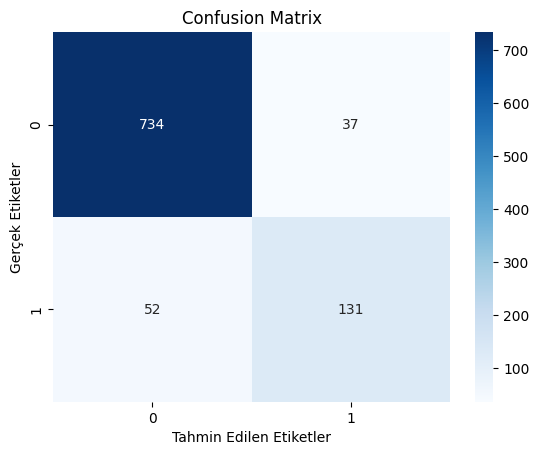

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Heatmap'i çizme
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Eksen etiketlerini ayarlama
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")

# Grafiği gösterme
plt.show()


In [64]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_test_pred)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[734  37]
 [ 52 131]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       771
           1       0.78      0.72      0.75       183

    accuracy                           0.91       954
   macro avg       0.86      0.83      0.84       954
weighted avg       0.90      0.91      0.91       954



In [65]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9067085953878407


In [66]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print("Precison:", precision)
print("Recall:", recall)

Precison: 0.7797619047619048
Recall: 0.7158469945355191


In [67]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_test_pred)
print("F1 Skoru:", f1)

F1 Skoru: 0.7464387464387465


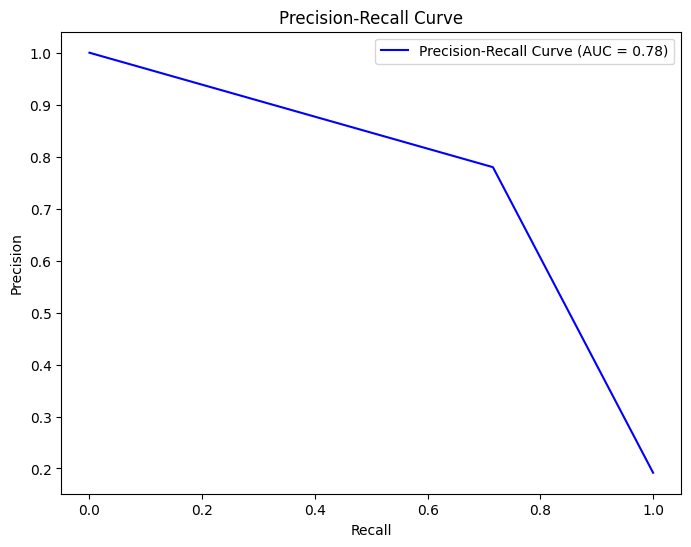

In [68]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
auc_score = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

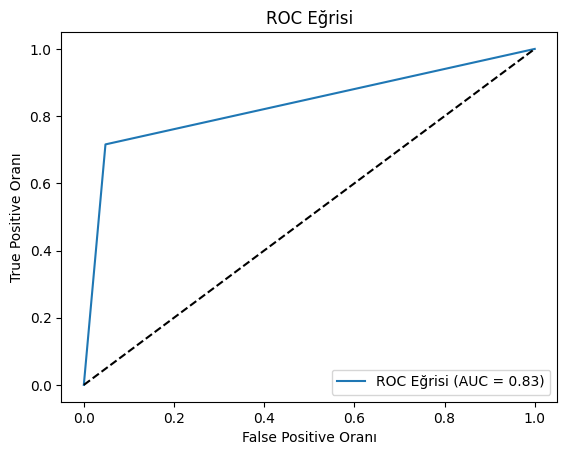

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred)

plt.plot(fpr, tpr, label='ROC Eğrisi (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

# **"Unseen Data"lar ile Modelin Müşteri Tarafından Kullanılması**

---

Bu aşamada, belirli bir performans ile üretilen AI modeli müsteriye teslim edilir.

Ve müşteri modeli üretilen yeni veriler (Unseen Data) ile kullanarak çıktıları alır. Unseen Data setinde girdiler vardır ama çıktı yoktur!

In [70]:
test_df

,index,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,4768,22.065764,25800.0,71759.0,63456.0,24.0,0.0,0.0,148.816285,0.0,8.0,0,0,1,0,0,0
1,4769,20.380464,16400.0,62018.0,91832.0,9.0,0.0,0.0,202.322500,0.0,19.0,0,0,0,1,0,0
2,4770,29.476003,22400.0,18371.0,38311.0,1.0,0.0,0.0,37.235000,2.0,3.0,0,0,1,0,0,0
3,4771,33.000000,33400.0,59000.0,85000.0,2.0,0.0,7.0,240.433333,3.0,26.0,1,0,0,0,0,1
4,4772,29.045964,23000.0,71902.0,101750.0,5.0,0.0,0.0,214.389252,0.0,13.0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,5955,25.991820,16100.0,26276.0,168105.0,7.0,0.0,0.0,336.198465,0.0,26.0,1,0,0,0,0,1
1188,5956,34.430575,16500.0,23169.0,41677.0,20.0,0.0,0.0,208.076943,2.0,15.0,0,0,0,1,0,0
1189,5957,33.000000,6500.0,70300.0,107500.0,1.0,0.0,0.0,242.466667,1.0,38.0,0,1,0,0,0,0
1190,5958,27.056727,26700.0,81968.0,114647.0,10.0,0.0,1.0,126.707320,0.0,19.0,0,0,0,1,0,0


In [71]:
unseen_dataset = test_df.drop('index', axis=1)
unseen_dataset

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,22.065764,25800.0,71759.0,63456.0,24.0,0.0,0.0,148.816285,0.0,8.0,0,0,1,0,0,0
1,20.380464,16400.0,62018.0,91832.0,9.0,0.0,0.0,202.322500,0.0,19.0,0,0,0,1,0,0
2,29.476003,22400.0,18371.0,38311.0,1.0,0.0,0.0,37.235000,2.0,3.0,0,0,1,0,0,0
3,33.000000,33400.0,59000.0,85000.0,2.0,0.0,7.0,240.433333,3.0,26.0,1,0,0,0,0,1
4,29.045964,23000.0,71902.0,101750.0,5.0,0.0,0.0,214.389252,0.0,13.0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,25.991820,16100.0,26276.0,168105.0,7.0,0.0,0.0,336.198465,0.0,26.0,1,0,0,0,0,1
1188,34.430575,16500.0,23169.0,41677.0,20.0,0.0,0.0,208.076943,2.0,15.0,0,0,0,1,0,0
1189,33.000000,6500.0,70300.0,107500.0,1.0,0.0,0.0,242.466667,1.0,38.0,0,1,0,0,0,0
1190,27.056727,26700.0,81968.0,114647.0,10.0,0.0,1.0,126.707320,0.0,19.0,0,0,0,1,0,0


In [72]:
unseen_dataset = unseen_dataset.iloc[:, :].values
unseen_dataset

array([[2.20657636e+01, 2.58000000e+04, 7.17590000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.03804642e+01, 1.64000000e+04, 6.20180000e+04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.94760034e+01, 2.24000000e+04, 1.83710000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.30000000e+01, 6.50000000e+03, 7.03000000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.70567270e+01, 2.67000000e+04, 8.19680000e+04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.08570671e+01, 1.95000000e+04, 9.45430000e+04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [73]:
y_pred_unseen = model.predict(unseen_dataset)
y_pred_unseen

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
y_pred_unseen_df = pd.DataFrame(y_pred_unseen, columns=["BAD"])
y_pred_unseen_df

,BAD
0,0
1,0
2,0
3,1
4,0
...,...
1187,0
1188,0
1189,0
1190,0


In [75]:
sub_test = pd.DataFrame(test_df['index'])
sub_test

,index
0,4768
1,4769
2,4770
3,4771
4,4772
...,...
1187,5955
1188,5956
1189,5957
1190,5958


In [76]:
sub_df = pd.concat([sub_test, y_pred_unseen_df], axis=1)
sub_df

,index,BAD
0,4768,0
1,4769,0
2,4770,0
3,4771,1
4,4772,0
...,...,...
1187,5955,0
1188,5956,0
1189,5957,0
1190,5958,0


In [77]:
# Submission dosyasını oluşturun
submission_file = 'sample_submission.csv'
sub_df.to_csv(submission_file, index=False)

# Oluşturulan dosyayı görüntüleyin
print("Submission dosyası oluşturuldu:")
sub_df

Submission dosyası oluşturuldu:


,index,BAD
0,4768,0
1,4769,0
2,4770,0
3,4771,1
4,4772,0
...,...,...
1187,5955,0
1188,5956,0
1189,5957,0
1190,5958,0
